<a href="https://colab.research.google.com/github/Shreyaprashanth/Samsung__Innovation__Campus/blob/main/StressLevel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kagglehub

In [ ]:
import kagglehub
import pandas as pd
import os
###############################################################
# Specify the dataset identifier (user/dataset-name) and the file within the dataset
dataset_owner = "mdsultanulislamovi"
dataset_name = "student-stress-monitoring-datasets"
dataset_handle = f"{dataset_owner}/{dataset_name}"
###############################################################
# Download the dataset to a local directory
local_path = kagglehub.dataset_download(dataset_handle)
###############################################################
# List the contents of the downloaded directory to find the correct file path
print(f"Dataset downloaded to: {local_path}")
###############################################################
print("Contents of the dataset:")
###############################################################
for root, dirs, files in os.walk(local_path):
    level = root.replace(local_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f'{subindent}{f}')
###############################################################
# Once you find the correct file path, replace "SouthAfricaCrimeStats_v2.csv"
# with the correct path and uncomment the line below to load the data into a DataFrame.
file_path_within_dataset = "StressLevelDataset.csv"
###############################################################
df = pd.read_csv(os.path.join(local_path, file_path_within_dataset))
###############################################################
# display(df.head())
df.head()

Dataset downloaded to: /kaggle/input/student-stress-monitoring-datasets
Contents of the dataset:
student-stress-monitoring-datasets/
    StressLevelDataset.csv
    Stress_Dataset.csv


anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2                     3           2   
1                  1  ...            2                     1           4   
2                  2  ...            2                     2           3   
3                  2  ...            2                     2           4   
4                  2  ...            3                     4           3   

   teacher_student_relationship  future_career_concerns  social_support  \
0                             3                       3               2   
1                             1                       5               1   
2                             3                       2               2   
3                             1                       4               1   
4                             1                       2               1   

   peer_pressure  extracurricular_activities  bullying  stress_level  
0              3                           3         2             1  
1              4                           5         5             2  
2              3                           2         2             1  
3              4                           4         5             2  
4              5                           0         5             1  

[5 rows x 21 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
cluster = KMeans(n_clusters=3, random_state=0)

cluster.fit(df)

KMeans(n_clusters=3, random_state=0)

In [ ]:
cluster.fit_predict(df)

array([0, 2, 0, ..., 1, 2, 2], dtype=int32)

<Axes: >

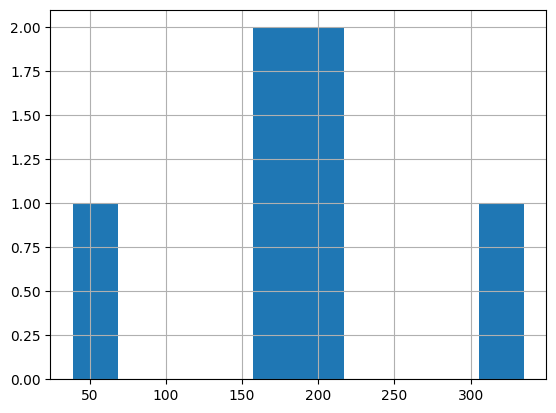

In [ ]:
df['bullying'].value_counts().hist()

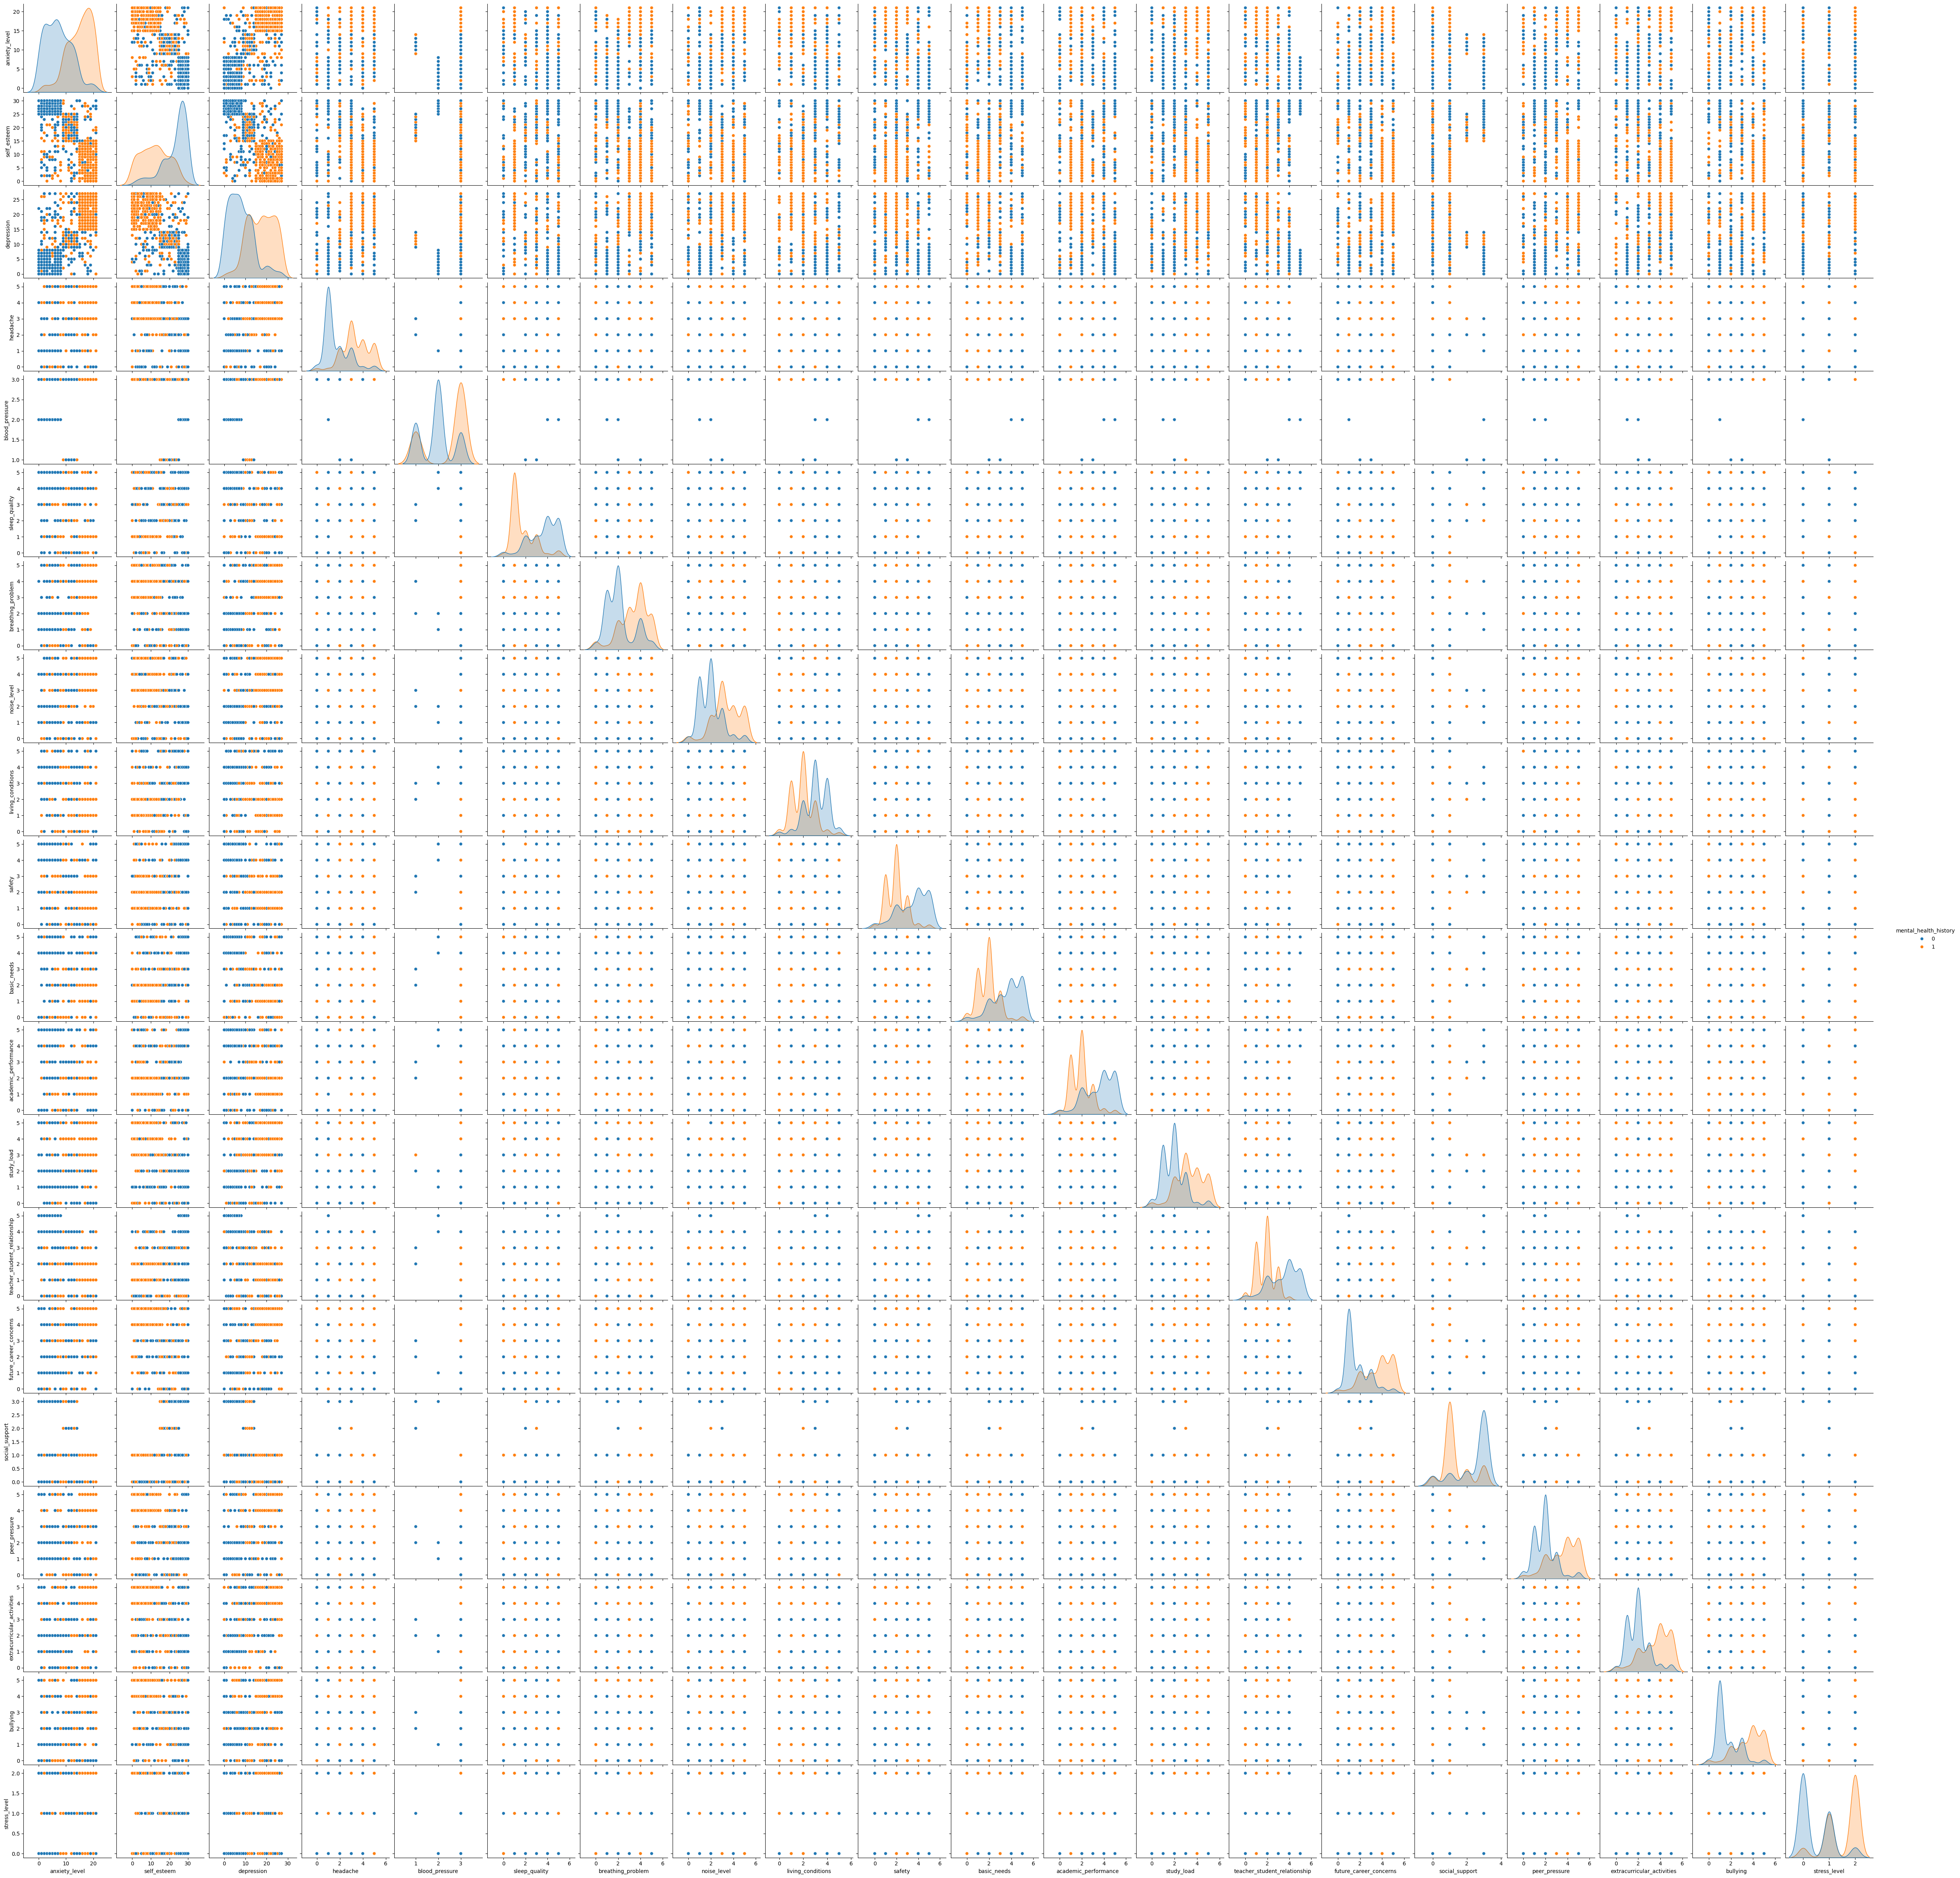

In [ ]:
import seaborn as sns

sns.pairplot(df, hue='mental_health_history',palette='tab10')

<Axes: >

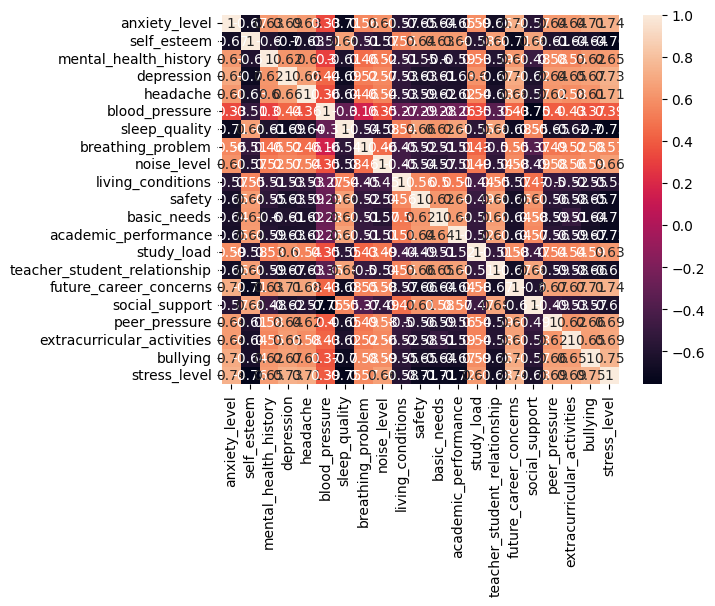

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='sleep_quality', ylabel='peer_pressure'>

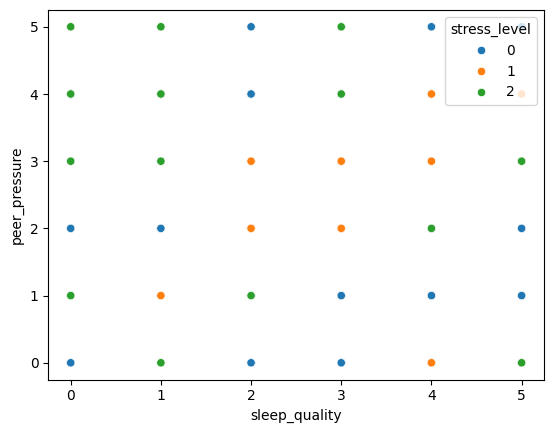

In [ ]:
sns.scatterplot(x=df['sleep_quality'],
            y=df['peer_pressure'],
            hue=df['stress_level'],
            palette='tab10')

<Axes: xlabel='academic_performance', ylabel='self_esteem'>

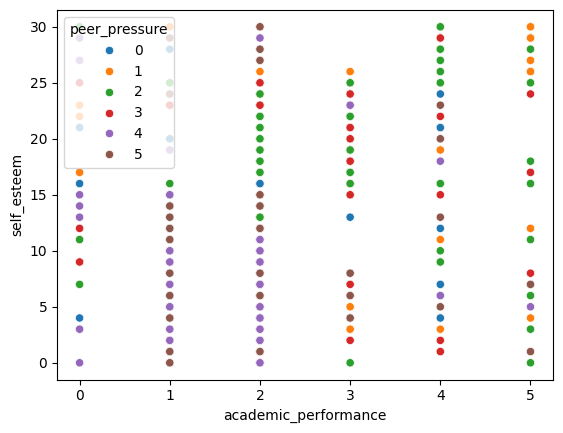

In [ ]:
sns.scatterplot(x=df['academic_performance'],
            y=df['self_esteem'],
            hue=df['peer_pressure'],
            palette='tab10')